# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_OmeTv_1.csv")
df.head()

,userName,score,at,content
0,Berlin Mas,5,2024-05-05 18:18:13,💪
1,Katiman Mandek,5,2024-05-05 18:00:57,sangat baik
2,What Thehel,1,2024-05-05 17:49:15,"perasaan gua ga ngapa""in tapi ko gua di blg pe..."
3,Asih purnami,5,2024-05-05 17:42:13,Kok banned
4,Delfin Alfahrizi,1,2024-05-05 16:44:50,Banyak peraturannya


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,💪,Berlin Mas,2024-05-05 18:18:13
1,sangat baik,Katiman Mandek,2024-05-05 18:00:57
2,"perasaan gua ga ngapa""in tapi ko gua di blg pe...",What Thehel,2024-05-05 17:49:15
3,Kok banned,Asih purnami,2024-05-05 17:42:13
4,Banyak peraturannya,Delfin Alfahrizi,2024-05-05 16:44:50
...,...,...,...
194,banyak orang yg gk sopan,eeskil eskil,2024-04-25 12:28:56
195,Bagus bget,Alvin Afandi,2024-04-25 10:01:08
196,Memdin g usah download bagus,Fahri,2024-04-25 09:57:48
197,Tolong dong OmeTV Perhatiin orang yang lagi vc...,ilma Nafia,2024-04-25 09:02:46


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,193,199,199
top,Bagus,Berlin Mas,2024-05-05 18:18:13
freq,5,1,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(193, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,,Berlin Mas,2024-05-05 18:18:13
1,sangat baik,Katiman Mandek,2024-05-05 18:00:57
2,perasaan gua ga ngapain tapi ko gua di blg pen...,What Thehel,2024-05-05 17:49:15
3,kok banned,Asih purnami,2024-05-05 17:42:13
4,banyak peraturannya,Delfin Alfahrizi,2024-05-05 16:44:50
...,...,...,...
194,banyak orang yg gk sopan,eeskil eskil,2024-04-25 12:28:56
195,bagus bget,Alvin Afandi,2024-04-25 10:01:08
196,memdin g usah download bagus,Fahri,2024-04-25 09:57:48
197,tolong dong ometv perhatiin orang yang lagi vc...,ilma Nafia,2024-04-25 09:02:46


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,,Berlin Mas,2024-05-05 18:18:13
1,sangat baik,Katiman Mandek,2024-05-05 18:00:57
2,perasaan gua ga ngapain tapi ko gua di blg pen...,What Thehel,2024-05-05 17:49:15
3,kenapa banned,Asih purnami,2024-05-05 17:42:13
4,banyak peraturannya,Delfin Alfahrizi,2024-05-05 16:44:50
...,...,...,...
194,banyak orang yang gk sopan,eeskil eskil,2024-04-25 12:28:56
195,bagus bget,Alvin Afandi,2024-04-25 10:01:08
196,memdin g usah download bagus,Fahri,2024-04-25 09:57:48
197,tolong dong ometv perhatiin orang yang lagi vc...,ilma Nafia,2024-04-25 09:02:46


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,,Berlin Mas,2024-05-05 18:18:13
1,sangat baik,Katiman Mandek,2024-05-05 18:00:57
2,perasaan gua ga ngapain ko gua blg penyalah gu...,What Thehel,2024-05-05 17:49:15
3,banned,Asih purnami,2024-05-05 17:42:13
4,banyak peraturannya,Delfin Alfahrizi,2024-05-05 16:44:50
...,...,...,...
194,banyak orang gk sopan,eeskil eskil,2024-04-25 12:28:56
195,bagus bget,Alvin Afandi,2024-04-25 10:01:08
196,memdin g usah download bagus,Fahri,2024-04-25 09:57:48
197,dong ometv perhatiin orang lagi vc an kadang s...,ilma Nafia,2024-04-25 09:02:46


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                                     []
1                                         [sangat, baik]
2      [perasaan, gua, ga, ngapain, ko, gua, blg, pen...
3                                               [banned]
4                                 [banyak, peraturannya]
                             ...                        
194                           [banyak, orang, gk, sopan]
195                                        [bagus, bget]
196                   [memdin, g, usah, download, bagus]
197    [dong, ometv, perhatiin, orang, lagi, vc, an, ...
198                                       [nah, id, win]
Name: content, Length: 193, dtype: object

In [19]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_OmeTv_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_OmeTv_1.csv', encoding = 'latin1')
df_clean

,content
0,NaN
1,sangat baik
2,asa gua ga ngapain ko gua blg salah guna yaa d...
3,banned
4,banyak atur
...,...
188,banyak orang gk sopan
189,bagus bget
190,memdin g usah download bagus
191,dong ometv perhatiin orang lagi vc an kadang s...


# **Translate**

In [21]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [22]:
import pandas as pd
from easynmt import EasyNMT

In [23]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_OmeTv_1.csv', encoding='latin1')

In [24]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [25]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 12.4MB/s]                   


In [26]:
df2 = df_clean.fillna(method = 'bfill')
df2

,content
0,sangat baik
1,sangat baik
2,asa gua ga ngapain ko gua blg salah guna yaa d...
3,banned
4,banyak atur
...,...
188,banyak orang gk sopan
189,bagus bget
190,memdin g usah download bagus
191,dong ometv perhatiin orang lagi vc an kadang s...


In [27]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_OmeTv_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_OmeTv_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,sangat baik,Very good.
1,1,sangat baik,Very good.
2,2,asa gua ga ngapain ko gua blg salah guna yaa d...,"fontcolor="" # FFFF00""supposeIdidnotdo anything..."
3,3,banned,banned
4,4,banyak atur,many settings
...,...,...,...
188,188,banyak orang gk sopan,A lot of people aren't polite.
189,189,bagus bget,That's good. That's good.
190,190,memdin g usah download bagus,medin don't need a good download
191,191,dong ometv perhatiin orang lagi vc an kadang s...,Let ometv look out for people again vc and som...


# **Labeling**

In [31]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_OmeTv_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,sangat baik,Very good.
1,1,sangat baik,Very good.
2,2,asa gua ga ngapain ko gua blg salah guna yaa d...,"fontcolor="" # FFFF00""supposeIdidnotdo anything..."
3,3,banned,banned
4,4,banyak atur,many settings
...,...,...,...
188,188,banyak orang gk sopan,A lot of people aren't polite.
189,189,bagus bget,That's good. That's good.
190,190,memdin g usah download bagus,medin don't need a good download
191,191,dong ometv perhatiin orang lagi vc an kadang s...,Let ometv look out for people again vc and som...


In [32]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [33]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 63
Netral = 80
Negatif = 50

Total Data Seluruhnya : 193


In [35]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,sangat baik,Very good.,Positif
1,1,sangat baik,Very good.,Positif
2,2,asa gua ga ngapain ko gua blg salah guna yaa d...,"fontcolor="" # FFFF00""supposeIdidnotdo anything...",Positif
3,3,banned,banned,Netral
4,4,banyak atur,many settings,Positif
...,...,...,...,...
188,188,banyak orang gk sopan,A lot of people aren't polite.,Netral
189,189,bagus bget,That's good. That's good.,Positif
190,190,memdin g usah download bagus,medin don't need a good download,Positif
191,191,dong ometv perhatiin orang lagi vc an kadang s...,Let ometv look out for people again vc and som...,Positif


In [36]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,sangat baik,Very good.,Positif
1,sangat baik,Very good.,Positif
2,asa gua ga ngapain ko gua blg salah guna yaa d...,"fontcolor="" # FFFF00""supposeIdidnotdo anything...",Positif
3,banned,banned,Netral
4,banyak atur,many settings,Positif
...,...,...,...
188,banyak orang gk sopan,A lot of people aren't polite.,Netral
189,bagus bget,That's good. That's good.,Positif
190,memdin g usah download bagus,medin don't need a good download,Positif
191,dong ometv perhatiin orang lagi vc an kadang s...,Let ometv look out for people again vc and som...,Positif


# **Visualisasi**


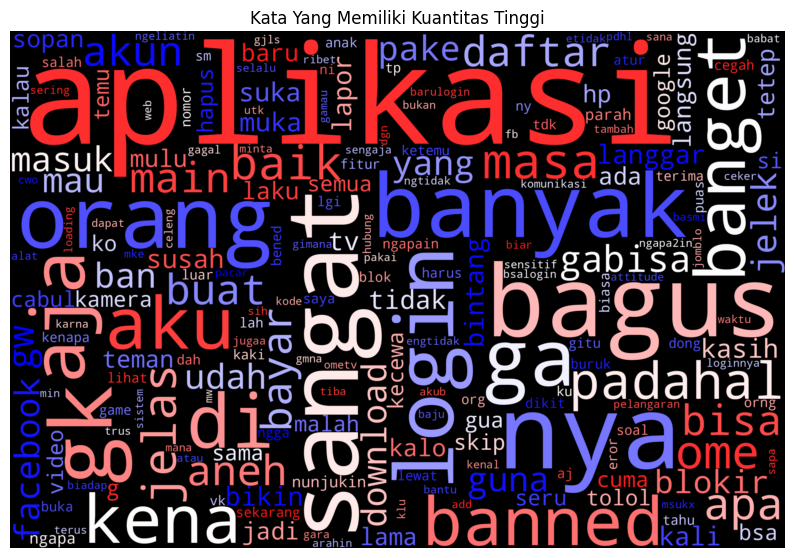

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


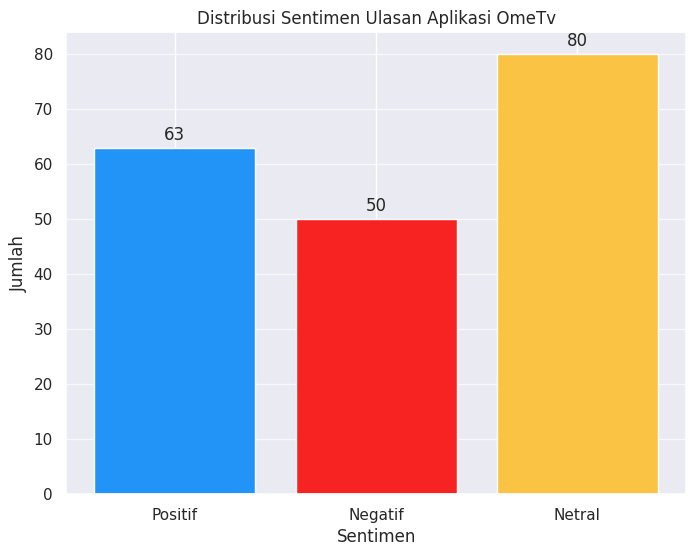

In [38]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi OmeTv")


In [39]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,sangat baik,Very good.,Positif
1,sangat baik,Very good.,Positif
2,asa gua ga ngapain ko gua blg salah guna yaa d...,"fontcolor="" # FFFF00""supposeIdidnotdo anything...",Positif
4,banyak atur,many settings,Positif
6,gk buat akub barulogin facebook gk bsalogin pa...,don't make new accounts facebook can't be logg...,Positif
...,...,...,...
185,wahhh keren parah cooo colmek,"fontcolor="" # FFFF00""ahhh fontcolor="" # FFFF00...",Positif
186,ingat aplikasi banyak cabul,Remember many obscene applications,Positif
189,bagus bget,That's good. That's good.,Positif
190,memdin g usah download bagus,medin don't need a good download,Positif


In [40]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,sangat baik,Very good.,1
1,sangat baik,Very good.,1
2,asa gua ga ngapain ko gua blg salah guna yaa d...,"fontcolor="" # FFFF00""supposeIdidnotdo anything...",1
4,banyak atur,many settings,1
6,gk buat akub barulogin facebook gk bsalogin pa...,don't make new accounts facebook can't be logg...,1
...,...,...,...
185,wahhh keren parah cooo colmek,"fontcolor="" # FFFF00""ahhh fontcolor="" # FFFF00...",1
186,ingat aplikasi banyak cabul,Remember many obscene applications,1
189,bagus bget,That's good. That's good.,1
190,memdin g usah download bagus,medin don't need a good download,1


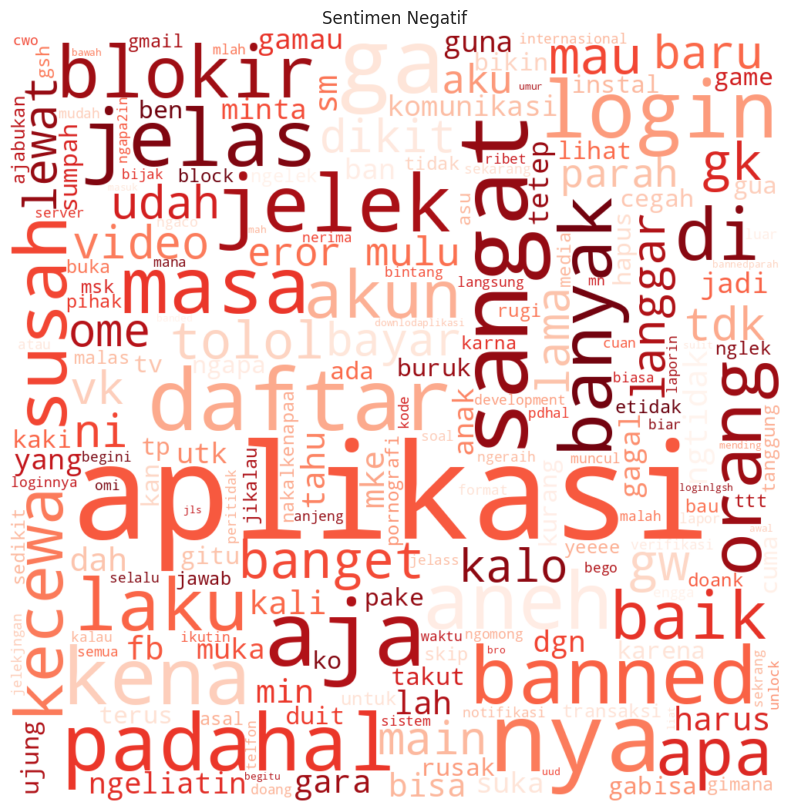

In [41]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

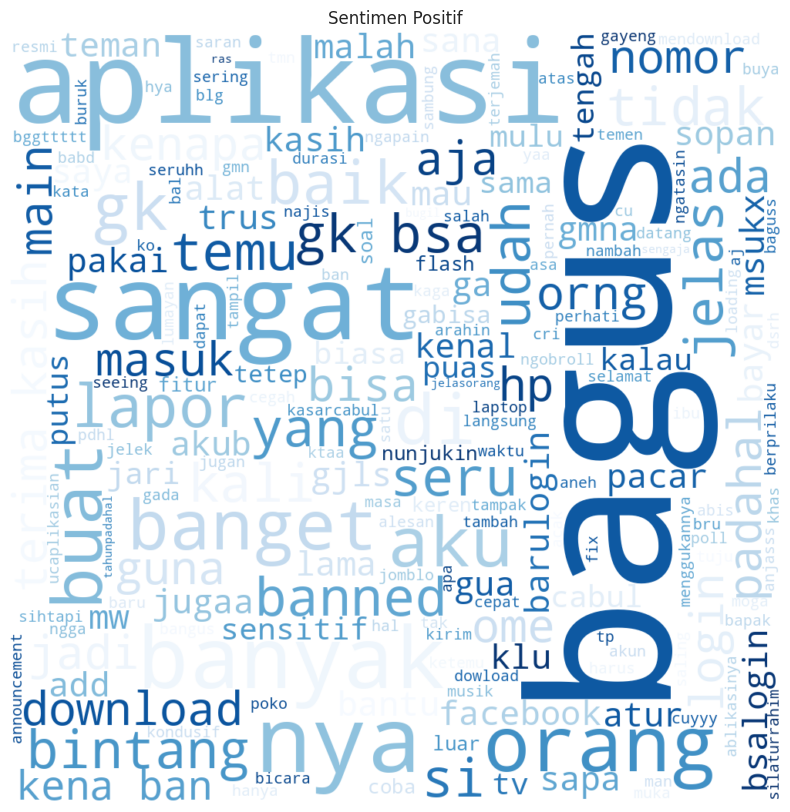

In [42]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [43]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    63
0    50
Name: count, dtype: int64

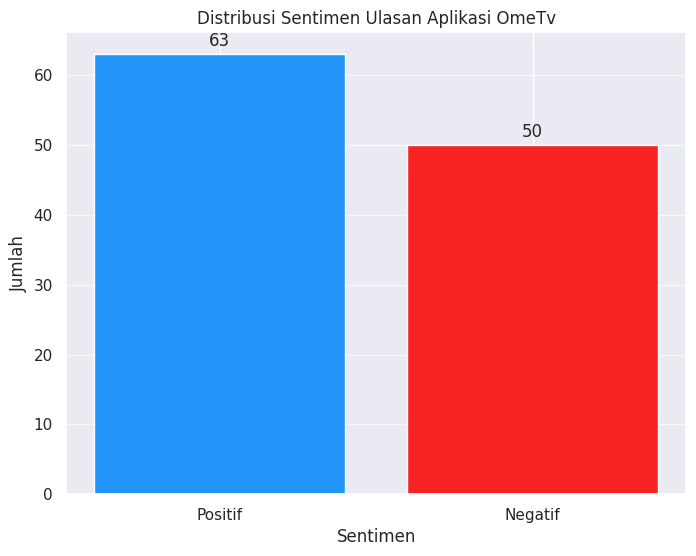

In [44]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi OmeTv")

# **Data Preparation**

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [48]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

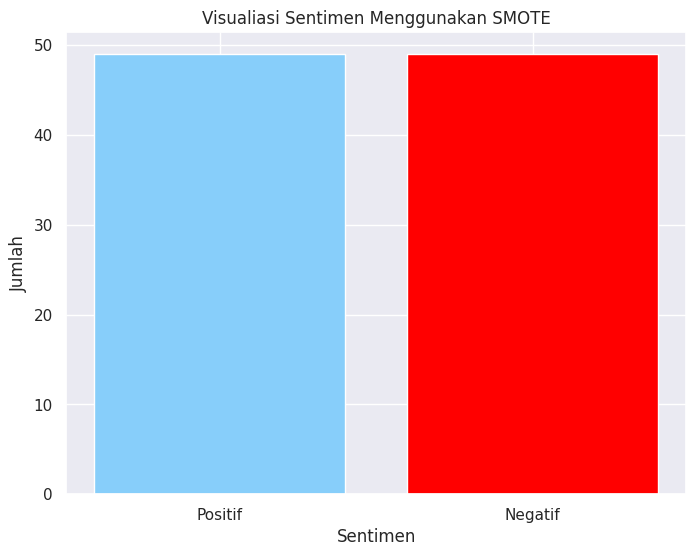

In [49]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [50]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [51]:
y_pred = naive_bayes.predict(X_test_vec)

In [52]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8695652173913043

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.75      1.00      0.86         9
     Positif       1.00      0.79      0.88        14

    accuracy                           0.87        23
   macro avg       0.88      0.89      0.87        23
weighted avg       0.90      0.87      0.87        23



In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 9  0]
 [ 3 11]]

True Positives (TP) =  9

True Negatives (TN) =  11

False Positives (FP) =  0

False Negatives (FN) =  3

Accuracy =  0.8695652173913043


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

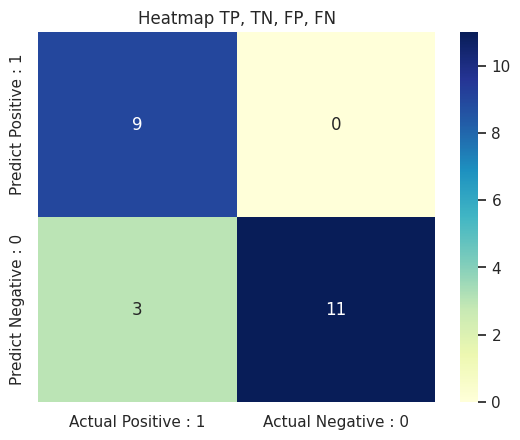

In [54]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [55]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [56]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8696


In [57]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1304


# **Testing**


In [58]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : jelek
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [59]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : lumayan bagus
Hasil Analisis Sentimen Untuk Teks Baru : Positif
